Hello everyone! In this study, we basically will do hypothesis testing between "**Department**" and "**GPA**"(success average).

Namely, we will look at "**Statistically, Is there a difference between GPAs of each Departments or not?**"

**Note:** This notebook is for that one who has a little knowledge about hypothesis test.

Big thanks to [@zeeshier](https://www.kaggle.com/zeeshier) for this dataset.

# Hypothesis

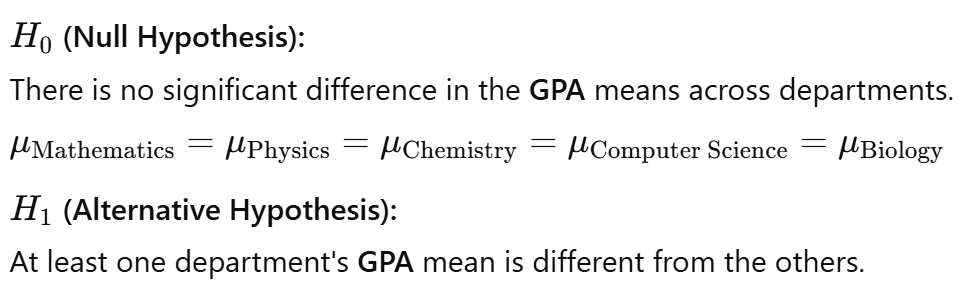

# Libraries

In [1]:
import pandas as pd # for data process
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for boxplot graph
from scipy.stats import shapiro, levene, f_oneway, kruskal # for all tests (it will be explained below)

# Importing Student Dataset

In [2]:
file_path = "/kaggle/input/student-information-dataset/students.csv"
data = pd.read_csv(file_path)

data.head()

,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,3336,David Palmer,19,sean43@hotmail.com,Mathematics,3.16,2026
1,8774,Andrew Roach,23,vbecker@harvey.com,Chemistry,3.75,2027
2,1396,Jonathan Gonzalez,22,hollydavis@gmail.com,Physics,2.95,2027
3,6716,Kenneth Morrow,24,ganderson@wheeler-atkins.info,Physics,3.55,2029
4,8830,Kaitlyn Martinez,18,hayesdiane@gmail.com,Chemistry,2.29,2025


# Descriptive Statistics for Department

In [3]:
department_gpa_summary = data.groupby("Department")["GPA"].describe()
print(department_gpa_summary)

                  count      mean       std   min     25%   50%     75%   max
Department                                                                   
Biology            27.0  2.915556  0.582431  2.10  2.5000  2.76  3.3150  3.98
Chemistry          46.0  2.936304  0.578540  2.03  2.3575  2.96  3.3800  3.98
Computer Science   46.0  3.044348  0.643572  2.00  2.4850  3.12  3.6200  3.97
Mathematics        30.0  3.080667  0.535054  2.02  2.7125  3.17  3.4325  3.99
Physics            51.0  3.123922  0.590254  2.01  2.7450  3.21  3.5600  3.97


With code above, we can see that there are **5 departments as unique** because of <code>groupby</code> command.

**(Biology, Chemistry, Computer Science, Mathematics, Physics)**

When we examined the result, we see that they have same means **visually**.

But we have to see if it is **statistically significant**.

# Visualization

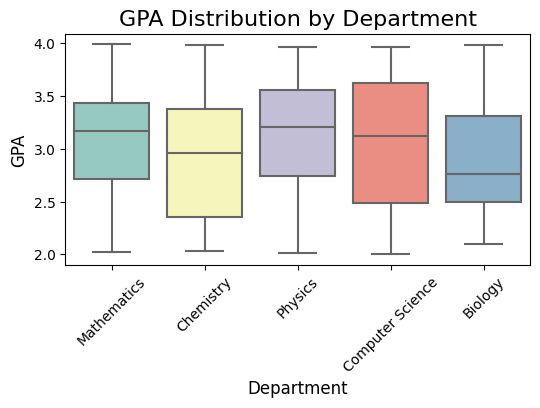

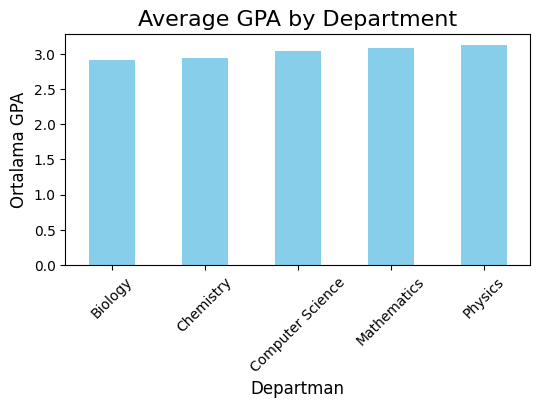

In [4]:
# Boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x="Department", y="GPA", data=data, palette="Set3")
plt.title("GPA Distribution by Department", fontsize=16)
plt.xlabel("Department", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Average GPA Visualization
mean_gpa = data.groupby("Department")["GPA"].mean().sort_values()

plt.figure(figsize=(6, 3))
mean_gpa.plot(kind="bar", color="skyblue")
plt.title("Average GPA by Department", fontsize=16)
plt.xlabel("Departman", fontsize=12)
plt.ylabel("Ortalama GPA", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Normality Test and Variance Homogeneity

These tests is for "**Which test should we use for hypothesis test? ANOVA as parametric or Kruskal-Wallis as non-parametric?**"

**Note:** We have to use one of ANOVA or Kruskal-Wallis because of Department variable has **more than 2 classes**.

In [5]:
# Normality Test (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
normality_results = {}
departments = data["Department"].unique() # for all unique departments
for dept in departments:
    gpa_values = data[data["Department"] == dept]["GPA"]
    stat, p_value = shapiro(gpa_values)
    normality_results[dept] = p_value
    print(f"{dept} - P-Value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  H₀ rejected for {dept}. GPA is not normally distributed.")
    else:
        print(f"  H₀ accepted for {dept}. GPA is normally distributed.")

# Variance Homogeneity Test (Levene)
stat, p_value = levene(*[data[data["Department"] == dept]["GPA"] for dept in departments])

print("\nVariance Homogeneity Test (Levene):")
print(f"P-değeri: {p_value:.4f}")
if p_value < 0.05:
    print("Result: H₀ rejected. Variances are not equal.")
else:
    print("Result: H₀ accepted. Variances are equal.")

Normality Test (Shapiro-Wilk):
Mathematics - P-Value: 0.2964
  H₀ accepted for Mathematics. GPA is normally distributed.
Chemistry - P-Value: 0.0427
  H₀ rejected for Chemistry. GPA is not normally distributed.
Physics - P-Value: 0.0049
  H₀ rejected for Physics. GPA is not normally distributed.
Computer Science - P-Value: 0.0049
  H₀ rejected for Computer Science. GPA is not normally distributed.
Biology - P-Value: 0.0445
  H₀ rejected for Biology. GPA is not normally distributed.

Variance Homogeneity Test (Levene):
P-değeri: 0.3822
Result: H₀ accepted. Variances are equal.


### As seen, there is some departments that does not follow a normal distribution.

### So we should use **Kruskal-Wallis Test**.

# Using Hypothesis Test

In [6]:
h_stat, p_value_kruskal = kruskal(*[data[data["Department"] == dept]["GPA"] for dept in departments])
print("\nKruskal-Wallis Test Results:")
print(f"H-Statistics: {h_stat:.4f}")
print(f"P-Value: {p_value_kruskal:.4f}")
if p_value_kruskal < 0.05:
    print("Result: H₀ rejected. At least one department's GPA average is different from the others.")
else:
    print("Result: H₀ accepted. GPA averages of all departments are equal statistically.")


Kruskal-Wallis Test Results:
H-Statistics: 3.7255
P-Value: 0.4444
Result: H₀ accepted. GPA averages of all departments are equal statistically.


# Final Result:

### There is no statistically significant difference in the GPA means across departments.

Thanks so much for reading until this. You can share your comments.

Happy learning!